In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from nachbarstrom import LocalImgDataProvider
from tf_unet import unet
from tf_unet import util

In [3]:
basedir = "/home/tomas/Desktop/labelbox-download/"
generator = LocalImgDataProvider(basedir=basedir)

In [4]:
x_test, y_test = generator(1)

In [5]:
y_test[:,:,].shape

(1, 640, 640, 2)

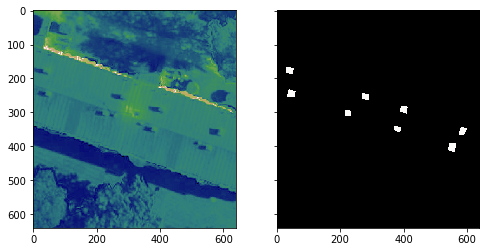

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2018-08-30 22:00:17,808 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [9]:
path = trainer.train(generator, "./unet_trained", training_iters=6, epochs=4, display_step=2)

2018-08-30 22:00:22,132 Removing '/home/tomas/tf_unet/demo/prediction'
2018-08-30 22:00:22,133 Removing '/home/tomas/tf_unet/demo/unet_trained'
2018-08-30 22:00:22,134 Allocating '/home/tomas/tf_unet/demo/prediction'
2018-08-30 22:00:22,135 Allocating '/home/tomas/tf_unet/demo/unet_trained'
2018-08-30 22:00:28,859 Verification error= 100.0%, loss= 0.2249
2018-08-30 22:00:29,418 Start optimization
2018-08-30 22:00:34,985 Iter 0, Minibatch Loss= 0.2592, Training Accuracy= 0.9999, Minibatch error= 0.0%
2018-08-30 22:00:43,066 Iter 2, Minibatch Loss= 0.2821, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-08-30 22:00:53,815 Iter 4, Minibatch Loss= 0.2250, Training Accuracy= 0.9576, Minibatch error= 4.2%
2018-08-30 22:00:59,703 Epoch 0, Average loss: 0.2523, learning rate: 0.2000
2018-08-30 22:01:07,679 Verification error= 0.0%, loss= 0.2105
/home/tomas/tf_unet/env/lib/python3.6/site-packages/tf_unet/util.py:74: RuntimeWarning: invalid value encountered in true_divide
  img /= np.amax

In [10]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2018-08-30 22:09:56,283 Restoring parameters from ./unet_trained/model.ckpt
2018-08-30 22:09:56,363 Model restored from file: ./unet_trained/model.ckpt


In [18]:
prediction[:,:,:,1]

array([[[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]]], dtype=float32)

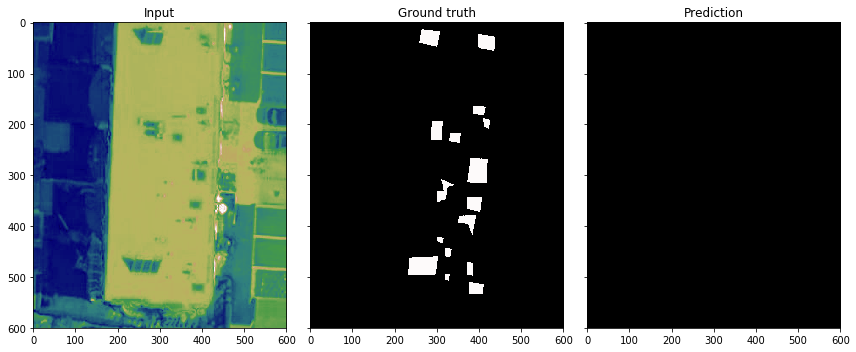

In [11]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspecat="auto")
# mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")